In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [9]:

# Suppress warnings
warnings.filterwarnings("ignore")

# Load datasets
test_url = "https://raw.githubusercontent.com/Dilaa13/ML_Projectby_DNN/refs/heads/main/test.csv"
train_url = "https://raw.githubusercontent.com/Dilaa13/ML_Projectby_DNN/refs/heads/main/train.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(train_url)

#Remove Unnecessary Columns
train_df.drop(columns=["Unnamed: 0", "id"], inplace=True)
test_df.drop(columns=["Unnamed: 0", "id"], inplace=True)

#Handle Missing Values
train_df["Arrival Delay in Minutes"].fillna(train_df["Arrival Delay in Minutes"].median(), inplace=True)
test_df["Arrival Delay in Minutes"].fillna(test_df["Arrival Delay in Minutes"].median(), inplace=True)

#Encode Categorical Variables
label_encoder = LabelEncoder()

#Encode categorical columns
for col in ["Gender", "Customer Type", "Type of Travel", "Class"]:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])

# Encode target variable: 'satisfaction' (Binary Classification: 0 or 1)
train_df["satisfaction"] = train_df["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})
test_df["satisfaction"] = test_df["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})

#Normalize Numerical Features
scaler = StandardScaler()

# List of numerical features (excluding target variable)
numerical_features = train_df.drop(columns=["satisfaction"]).columns

train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Display the first few rows after preprocessing
pd.concat([train_df.head(), test_df.head()], keys=["Train", "Test"])

Gender  Customer Type       Age  Type of Travel     Class  \
Train 0  1.015031      -0.472767 -1.745279        1.490614  2.264618   
      1  1.015031       2.115208 -0.951360       -0.670865 -0.957054   
      2 -0.985192      -0.472767 -0.885200       -0.670865 -0.957054   
      3 -0.985192      -0.472767 -0.951360       -0.670865 -0.957054   
      4  1.015031      -0.472767  1.430397       -0.670865 -0.957054   
Test  0  1.015031      -0.472767 -1.745279        1.490614  2.264618   
      1  1.015031       2.115208 -0.951360       -0.670865 -0.957054   
      2 -0.985192      -0.472767 -0.885200       -0.670865 -0.957054   
      3 -0.985192      -0.472767 -0.951360       -0.670865 -0.957054   
      4  1.015031      -0.472767  1.430397       -0.670865 -0.957054   

         Flight Distance  Inflight wifi service  \
Train 0        -0.731539               0.203579   
      1        -0.957184               0.203579   
      2        -0.047584              -0.549533   
      3        -0.629246              -0.549533   
      4        -0.978244               0.203579   
Test  0        -0.731539               0.203579   
      1        -0.957184               0.203579   
      2        -0.047584              -0.549533   
      3        -0.629246              -0.549533   
      4        -0.978244               0.203579   

         Departure/Arrival time convenient  Ease of Online booking  \
Train 0                           0.616172                0.173776   
      1                          -0.695245                0.173776   
      2                          -0.695245               -0.541060   
      3                           1.271880                1.603448   
      4                          -0.039537                0.173776   
Test  0                           0.616172                0.173776   
      1                          -0.695245                0.173776   
      2                          -0.695245               -0.541060   
      3                           1.271880                1.603448   
      4                          -0.039537                0.173776   

         Gate location  ...  Inflight entertainment  On-board service  \
Train 0      -1.547323  ...                1.231704          0.479403   
      1       0.018094  ...               -1.769081         -1.849161   
      2      -0.764614  ...                1.231704          0.479403   
      3       1.583511  ...               -1.018885         -1.072973   
      4       0.018094  ...               -0.268688         -0.296785   
Test  0      -1.547323  ...                1.231704          0.479403   
      1       0.018094  ...               -1.769081         -1.849161   
      2      -0.764614  ...                1.231704          0.479403   
      3       1.583511  ...               -1.018885         -1.072973   
      4       0.018094  ...               -0.268688         -0.296785   

         Leg room service  Baggage handling  Checkin service  \
Train 0          -0.26684          0.311769         0.549799   
      1           1.25338         -0.535045        -1.821012   
      2          -0.26684          0.311769         0.549799   
      3           1.25338         -0.535045        -1.821012   
      4           0.49327          0.311769        -0.240472   
Test  0          -0.26684          0.311769         0.549799   
      1           1.25338         -0.535045        -1.821012   
      2          -0.26684          0.311769         0.549799   
      3           1.25338         -0.535045        -1.821012   
      4           0.49327          0.311769        -0.240472   

         Inflight service  Cleanliness  Departure Delay in Minutes  \
Train 0          1.156436     1.305870                    0.266393   
      1          0.305848    -1.742292                   -0.361375   
      2          0.305848     1.305870                   -0.387532   
      3          0.305848    -0.980251                   -0.099805   
      4         -0.544740 

- Identify feature types(Numerical Vs catogerical)
- check for missing values and data consistancy.

In [11]:
# Split data into training and validation sets
X = train_df.drop(columns=["satisfaction"])
y = train_df["satisfaction"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8612 - loss: 0.3360 - val_accuracy: 0.9309 - val_loss: 0.1675
Epoch 2/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9228 - loss: 0.1896 - val_accuracy: 0.9456 - val_loss: 0.1338
Epoch 3/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9370 - loss: 0.1553 - val_accuracy: 0.9522 - val_loss: 0.1166
Epoch 4/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9413 - loss: 0.1418 - val_accuracy: 0.9527 - val_loss: 0.1117
Epoch 5/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9456 - loss: 0.1334 - val_accuracy: 0.9552 - val_loss: 0.1037
Epoch 6/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9491 - loss: 0.1233 - val_accuracy: 0.9569 - val_loss: 0.1006
Epoch 7/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9514 - loss: 0.1193 - val_accuracy: 0.9582 - val_loss: 0.0978
Epoch 8/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9517 - loss: 0.117

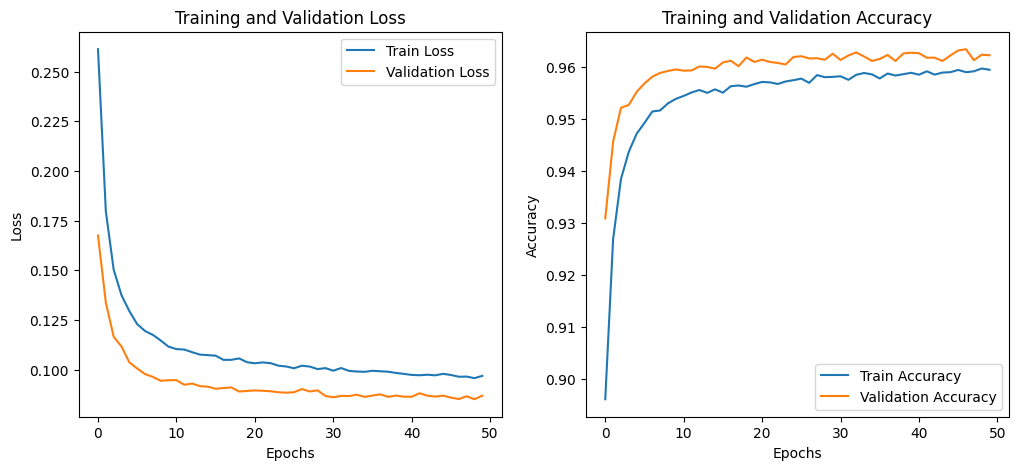

In [14]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()